<a href="https://colab.research.google.com/github/magdagucman/programming-for-data/blob/main/worksheets/Project_mregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Life Expectancy 
---

Using what you learnt in the previous worksheet, you will be performing a multiple linear regression on the life expectancy dataset. You will be using your statistical knowledge to see which (if any) of the variables predict life expectancy.  

URL = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/Life%20Expectancy%20Data.csv"

### **The data in question:**

The variables:

* Country 
* Year 
* Status - developing or developed status
* Life expectancy - in age (Target variable or IV)
* Adult mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Percentage expenditure - Expenditure on health as a percentage of GDP per capita(%)
* Hepititis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* Under five deaths - Number of under-five deaths per 1000 population
* Polio - Polio immunization coverage among 1-year-olds (%)
* Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)
* Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - per capita in USD 
* Population
* thinness 10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
* thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
* Income composition - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

**Run the cell block below to install and load the necessary packages**

In [ ]:
# this code needs to be run once to install the packages on your system
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")

# this code needs to be run to open the packages 

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers rather than in scientific form 

options(scipen = 999)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Exercise 1 - planning 
---

Make a note of which variable will be the IV and which variables will be used as the DVs


DV - Life Expectancy

IV - all the other variables except for country, year, GDP (it seems redundant while we have income composition HDI), thinnes for 10-19 (risk of it being highly correlated with thinness 5-9)

### Exercise 2 - read and inspect the data 
---
1. Set the data into a dataframe 
2. Inspect the data 

In [ ]:
data <- read_csv("https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/Life%20Expectancy%20Data.csv")

head(data)
summary(data)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Country = col_character(),
  Status = col_character()
)
ℹ Use `spec()` for the full column specifications.




Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,⋯,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


   Country               Year         Status          Life expectancy
 Length:2938        Min.   :2000   Length:2938        Min.   :36.30  
 Class :character   1st Qu.:2004   Class :character   1st Qu.:63.10  
 Mode  :character   Median :2008   Mode  :character   Median :72.10  
                    Mean   :2008                      Mean   :69.22  
                    3rd Qu.:2012                      3rd Qu.:75.70  
                    Max.   :2015                      Max.   :89.00  
                                                      NA's   :10     
 Adult Mortality infant deaths       Alcohol        percentage expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:228.0   3rd Qu.:  22.0   3rd Qu.: 7.7025   3rd Qu.:  441

### Exercise 3 - clean the data 
---

1. Check for NA values
2. Remove NA values if necessary 

In [ ]:
is.na(data)

data <- drop_na(data)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,⋯,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### Exercise 4 - dummy code 
---
1. dummy code the `status` variable 
2. make sure to remove first dummy and old column 

In [ ]:
data <- dummy_cols(data, select_columns = c('Status'), remove_first_dummy = TRUE, remove_selected_columns = TRUE)
head(data)

Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,⋯,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,⋯,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,1
Afghanistan,2014,59.9,271,64,0.01,73.523582,62,492,18.6,⋯,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0,1
Afghanistan,2013,59.9,268,66,0.01,73.219243,64,430,18.1,⋯,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9,1
Afghanistan,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,⋯,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8,1
Afghanistan,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,⋯,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5,1
Afghanistan,2010,58.8,279,74,0.01,79.679367,66,1989,16.7,⋯,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2,1


### Exercise 5 - visualise target variable (IV)
---

1. Visualise target variable on a histogram
2. How does the distribution look?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



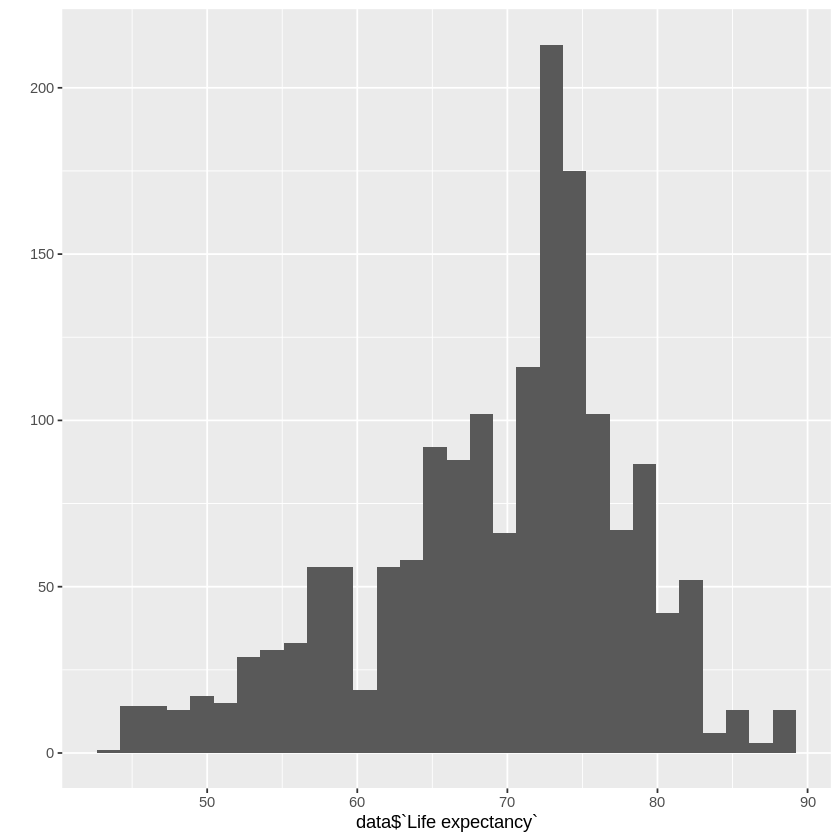

In [ ]:
qplot(data$`Life expectancy`, geom="histogram")

Looks like we're looking at a negative skewness and positive kurtosis, but shape resembles bell curve.

### Exercise 6 - perform multiple linear regression 
---

1. Run a linear regression to see if your target variables predict life expectancy 
2. display a summary of the regression 

In [ ]:
regression_model <- lm(`Life expectancy` ~ Status_Developing + `Adult Mortality` + `infant deaths` + Alcohol + `percentage expenditure` +
`Hepatitis B` + Measles + BMI + `under-five deaths` + Polio + `Total expenditure` + Diphtheria + `HIV/AIDS` + Population + `thinness 5-9 years`
+ `Income composition of resources` + Schooling, data = data)
summary(regression_model)


Call:
lm(formula = `Life expectancy` ~ Status_Developing + `Adult Mortality` + 
    `infant deaths` + Alcohol + `percentage expenditure` + `Hepatitis B` + 
    Measles + BMI + `under-five deaths` + Polio + `Total expenditure` + 
    Diphtheria + `HIV/AIDS` + Population + `thinness 5-9 years` + 
    `Income composition of resources` + Schooling, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.9616  -2.0659  -0.0128   2.2799  11.8305 

Coefficients:
                                          Estimate       Std. Error t value
(Intercept)                       54.4136951443419  0.8318550298397  65.412
Status_Developing                 -0.9729405728018  0.3369791428900  -2.887
`Adult Mortality`                 -0.0166218322511  0.0009483888338 -17.526
`infant deaths`                    0.0935668504027  0.0106443575495   8.790
Alcohol                           -0.0907861060091  0.0330575516586  -2.746
`percentage expenditure`           0.0004194971043  0.0000594729

### Exercise 7 - summary of results
---
Write some comments on your findings
* what variables significantly predict life expectancy?
* how well do your variables / model account for the variance (change) in life expectancy between countries?
* how does the slope (estimates) for each significant variable explain the impact on the IV 

**Significant predictors:**
* Schooling: 0.8688568420562 - the more years of schooling, the higher the life expectancy
* Income/Composition of resources based HDI: 9.8420244729315 - the higher the index, the higher the life expectancy
* HIV/AIDS: -0.4370314673219 - the more deaths, the lower the life expectancy
* Diphteria: 0.0149175737261 - the more immunized babies, the higher the life expectancy
* Under 5 deaths: -0.0704086277125 - the more deaths, the lower the life expectancy
* Adult Mortality: -0.0166218322511 - the more deaths, the lower the life expectancy
* BMI: 0.0337911317160 - the higher the BMI, the higher the life expectancy
* Percentage expenditure: 0.0004194971043 - the bigger the percentage, the higher the life expectancy
* Alcohol: -0.0907861060091 - the bigger the alcohol consumption, the lower the life expectancy
* Infant deaths: 0.0935668504027 - the more deaths, the lower the life expectancy
* Status_developing: -0.9729405728018 - developed countries have higher life expectancy then those still developing
* Thinness 5-9 years: -0.0586654016326 - the biggest the prevalence of thinnest, the lowest the life expectancy


Adjusted R-squared:  0.8338

There are 11 significant predictors of life expectancy. The model accounts for the variance very well - at 83%.

The best predictor is - by far - Income composition of resourses.

### Exercise 8 - checking assumptions
--- 

Check your model meets assumptions

1. check linearity plot
2. check Q-Q plot 
3. Does it meet assumptions?

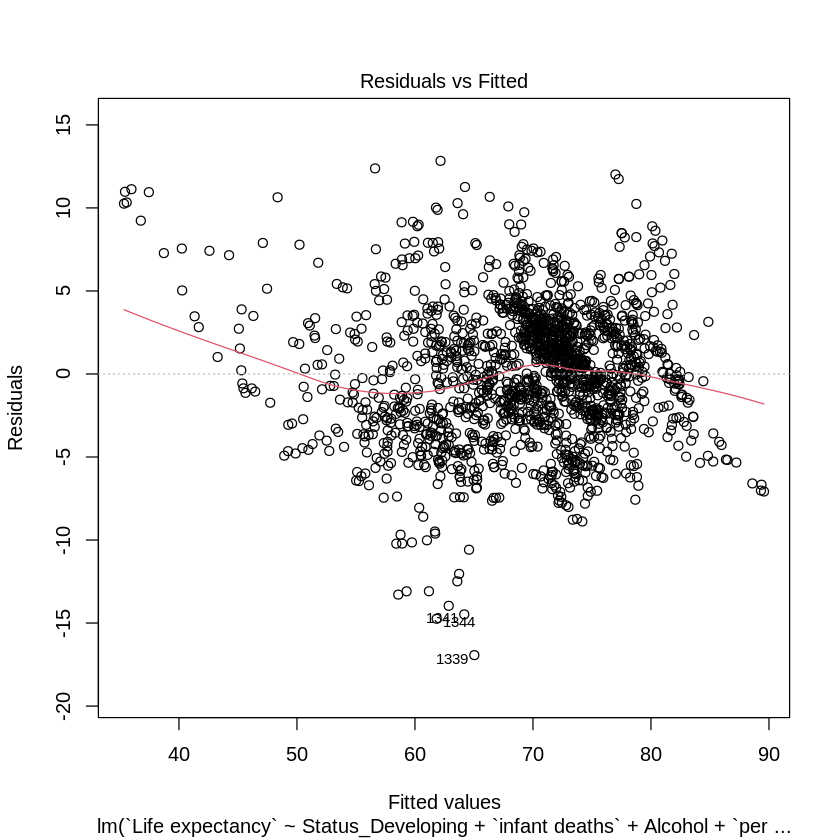

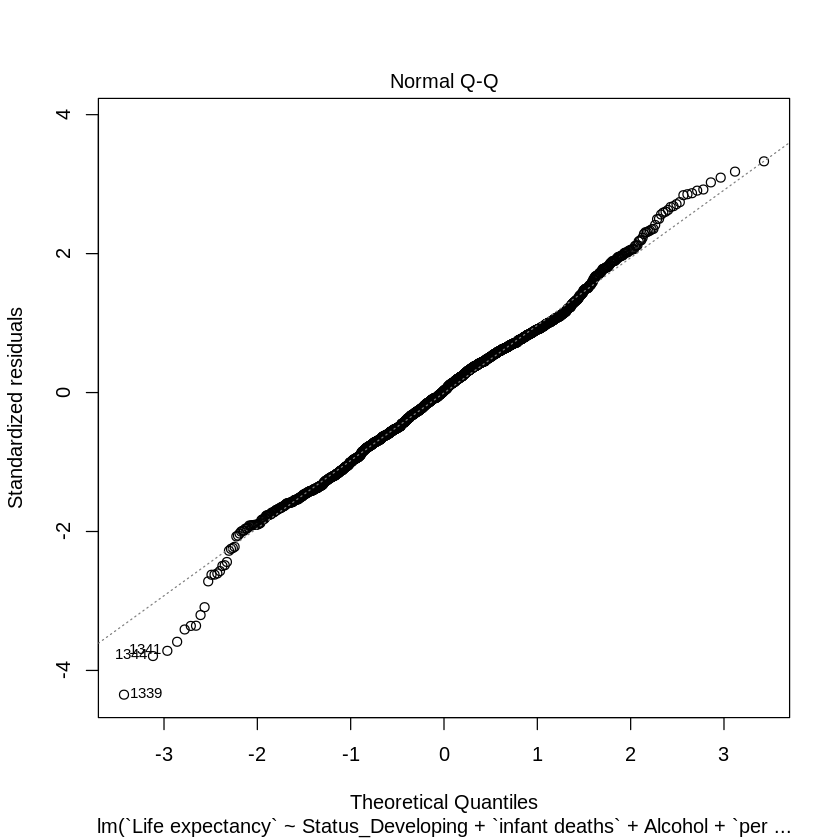

In [ ]:
plot(regression_model, 1)
plot(regression_model, 2)

Looking at the plot, the model seems to be meeting the assumption of normality

### Exercise 9 - contextualise 
--- 

Using the results from your analysis, write a few sentences which gives the data meaning 
* tell a story with the data
* what does this tell us about life expectancy?
* what makes the biggest impact on life expectancy?

**Life expectancy - the significant factors**

The results show that life expectancy is dependent on a variety of factors, seemingly straightforward and in line with intuition. 

The more deaths in groups of any age and prevalence of thinness among children result in lowering of the life expectancy, whereas immunizing the population against diseases is increasing it. Developed countries, countries with longer schooling, countries with higher Human Development Index in terms of income/composition of resources, countries with higher per capita expenditure on health and higher average BMI are, based on the model, predicted to have higher life expectancy. Lastly, the bigger the alcohol consumption, the shorter the life expectancy. These results are not suprising. 

The HDI based on income/composition of resources has by far the biggest impact on life expectancy according to the model - among other figures, it takes into account GDP, Income index, or Labour share of GDP (comprising wages and social protection transfers). Developed, wealthier countries spend more money on their health sectors and tend to have better education systems, too - and educated workforce possibly means not only better (safer and healthier) general life choices, but also more opportunities to work in safer professions (which in turn are more accessible in developed, wealthy countries). This naturally brings us to higher income, which can buy better food on individual level, and result in better accessibility of food on a country level - leading to higher BMI (and therefore less malnutrition). 

All seems to be leading us back to wealth and income distribution, which would impact factors such as access to healthcare and education, immunization programmes, low infant and children mortality, or access to appropriate nutrients.

### Exercise 10 - Explore the data further
---

Try running a regression with a different variable as the target variable (e.g. Status) and see if you can make any further predictions 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.




Call:
lm(formula = Status_Developing ~ `Adult Mortality` + `infant deaths` + 
    Alcohol + `percentage expenditure` + `Hepatitis B` + Measles + 
    BMI + `under-five deaths` + Polio + `Total expenditure` + 
    Diphtheria + `HIV/AIDS` + Population + `thinness 5-9 years` + 
    `thinness  10-19 years` + GDP + Schooling + `Life expectancy`, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01886 -0.10650  0.01713  0.16427  0.76050 

Coefficients:
                                  Estimate        Std. Error t value
(Intercept)               1.47094167807890  0.10862688134177  13.541
`Adult Mortality`         0.00017797756472  0.00007555077127   2.356
`infant deaths`           0.00029074774284  0.00079709210779   0.365
Alcohol                  -0.03830260954083  0.00220811468842 -17.346
`percentage expenditure` -0.00000921740803  0.00001316480480  -0.700
`Hepatitis B`            -0.00100470449285  0.00032451767556  -3.096
Measles                   0.00000073

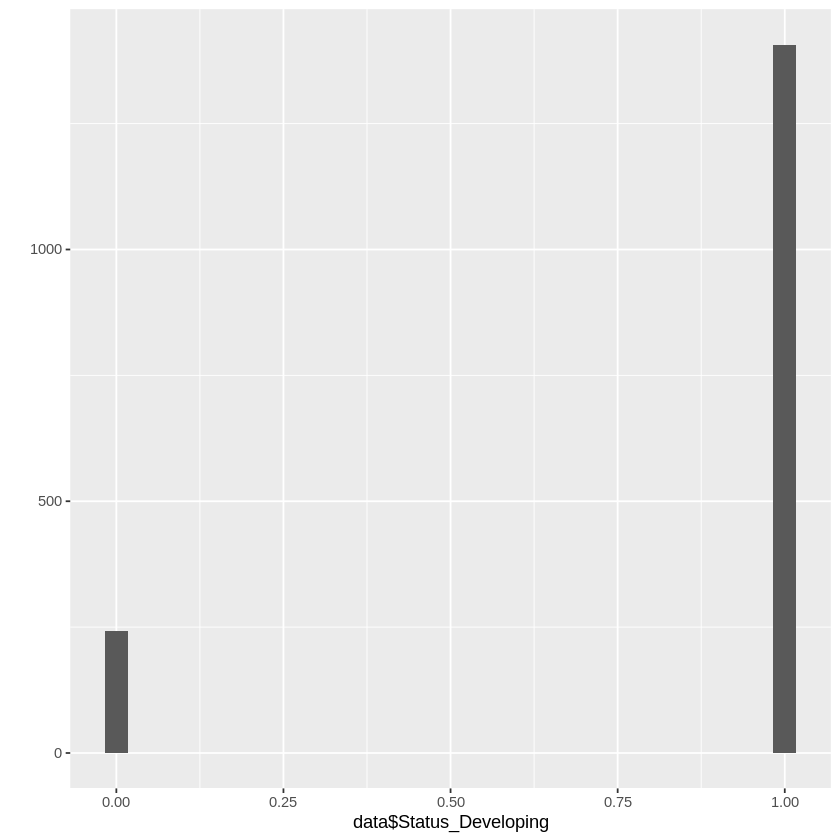

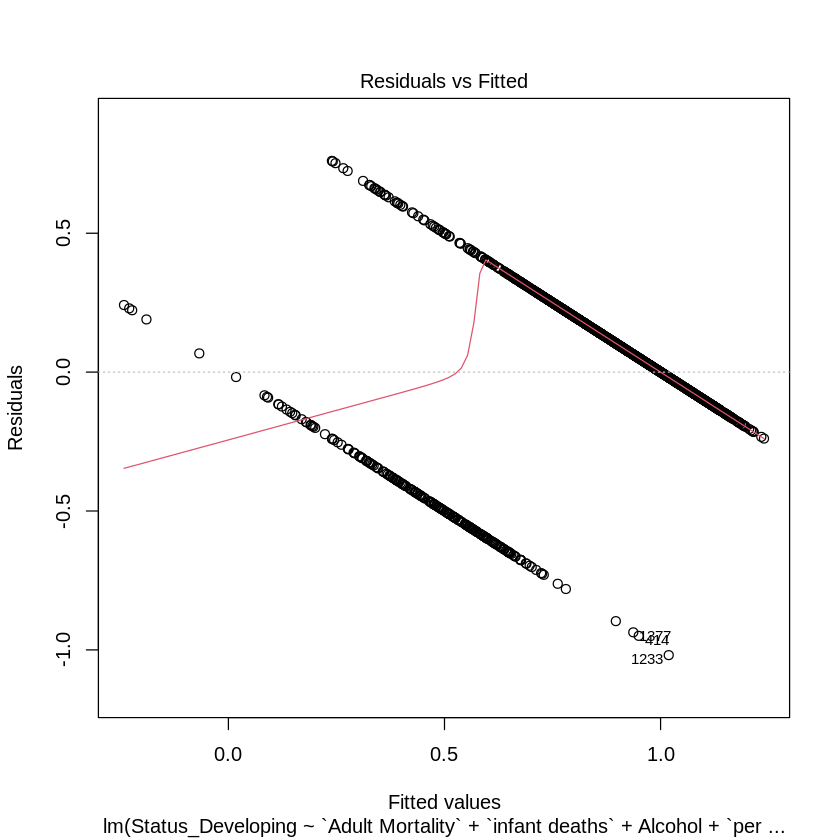

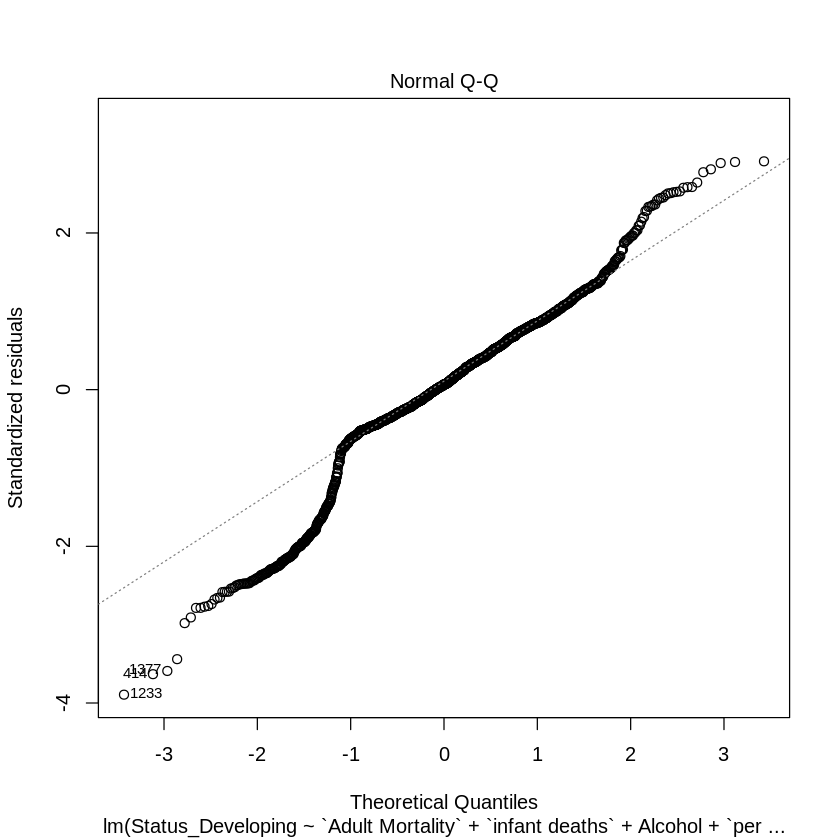

In [ ]:
qplot(data$`Status_Developing`, geom="histogram")

regression_model2 <- lm(`Status_Developing` ~ `Adult Mortality` + `infant deaths` + Alcohol + `percentage expenditure` +
`Hepatitis B` + Measles + BMI + `under-five deaths` + Polio + `Total expenditure` + Diphtheria + `HIV/AIDS` + Population + `thinness 5-9 years`+ `thinness  10-19 years`
+ `GDP` + Schooling + `Life expectancy`, data = data)
summary(regression_model2)

plot(regression_model2, 1)
plot(regression_model2, 2)

As Status is a dichotomous variable, it does not have a gaussian distribution and therefore doesn't fit the assumption of normality.

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: Ability to run multiple linear regression in R, make simple interpretation and describe the results.

## What caused you the most difficulty?

Your answer: Choosing independent variables that won't correlate with each other; telling the story.